# deleteme tensorflow debug

In [26]:
import tensorflow.compat.v1 as tf
import numpy as np

In [27]:
tf.one_hot(tf.constant([6]),depth=10).shape

TensorShape([1, 10])

In [46]:
tf.reset_default_graph()
q_state=tf.dtypes.cast(tf.constant(np.array([[5.0,10.0,25.0],[5.0,10.0,25.0],[5.0,10.0,25.0]])),dtype=tf.float32)
print(q_state.shape)
print(q_state.dtype)
action = tf.dtypes.cast(tf.transpose(tf.one_hot(tf.constant(2),depth=3)),dtype=tf.float32)
print(action.dtype)
print(action.shape)

tf.multiply(q_state,action)

q_action = tf.reduce_sum(tf.multiply(q_state,action))
print(q_action)

target_in=tf.constant(100.0)
loss = target_in-q_action
print(loss)

(3, 3)
<dtype: 'float32'>
<dtype: 'float32'>
(3,)
tf.Tensor(75.0, shape=(), dtype=float32)
tf.Tensor(25.0, shape=(), dtype=float32)


In [58]:
import pandas as pd
detail=pd.read_csv('/Users/aleph/Documents/jota/tesis/ts_mcfrl/python/data/results/two_customers_dqn_debug_sample/ep_0/movement_detail_report.csv')
def add_is_m(df):
    df['unit_cost']=(df.customer_cost/df.customer_units).fillna(0)
    df['is_m'] = df.unit_cost==1000
    return df
detail=add_is_m(detail)
detail.query('customer_cost>0').groupby('is_m').size().reset_index()

,is_m,0
0,False,182
1,True,2


NOW WE TALKING.

# 100 EP TEST

In [67]:
detail_100=pd.read_csv('/Users/aleph/Documents/jota/tesis/ts_mcfrl/python/data/results/two_customers_dqn_debug_sample/ep_99/movement_detail_report.csv')
detail_100=add_is_m(detail_100)
detail_100.query('customer_cost>0').groupby('is_m').size().reset_index()

,is_m,0
0,False,182
1,True,2


Checking what decisions are being made in the end

In [76]:
print("choices at ep 1")
display(detail.query('customer_cost>0').groupby(["source_name",'destination_name','is_m']).size().reset_index().sort_values(['destination_name']))
print("choices at ep 100")
display(detail_100.query('customer_cost>0').groupby(["source_name",'destination_name','is_m']).size().reset_index().sort_values(['destination_name']))

choices at ep 1


,source_name,destination_name,is_m,0
0,dcs_1,c_10,False,90
2,dcs_4,c_10,True,2
1,dcs_1,c_11,False,90
3,dcs_9,c_11,False,2


choices at ep 100


,source_name,destination_name,is_m,0
0,dcs_1,c_10,False,92
1,dcs_1,c_11,False,90
2,dcs_6,c_11,True,2


Now it seems the network understood the big Ms better, but still rewards are really big and i don't know if they reflect that 

Customer cost is down by 1 million cost units

In [66]:
print(detail.customer_cost.sum())
print(detail_100.customer_cost.sum())

2245160
1562100


Total costs also seem to be down by 60 million. Check and see why prints of total sum of rewards are so similar. Maybe they are cumulative?

In [77]:
summary_1=pd.read_csv("/Users/aleph/Documents/jota/tesis/ts_mcfrl/python/data/results/two_customers_dqn_debug_sample/ep_11/summary_movement_report.csv")
summary_100=pd.read_csv("/Users/aleph/Documents/jota/tesis/ts_mcfrl/python/data/results/two_customers_dqn_debug_sample/ep_99/summary_movement_report.csv")
print(summary_1.total_cost.sum())
print(summary_100.total_cost.sum())

8340720
2366340


Plot cost across EPS:

In [90]:
ep_costs=[]
num_eps=1000
for i in range(1,num_eps):
    summary_i = pd.read_csv(f"/Users/aleph/Documents/jota/tesis/ts_mcfrl/python/data/results/two_customers_dqn_debug_sample/ep_{i}/summary_movement_report.csv")
    ep_cost=summary_i.total_cost.sum()
    ep_costs.append(ep_cost)

Text(0.5, 1.0, 'DQN 1000 Episodes')

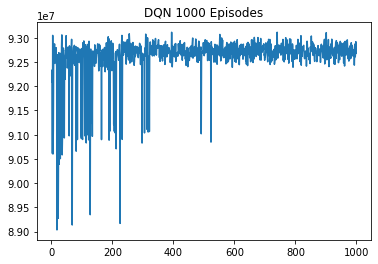

In [92]:
import seaborn as sns
sns.lineplot(range(1,num_eps),ep_costs).set_title("DQN 1000 Episodes")

In [113]:
display(pd.Series(ep_costs).describe().reset_index())
pd.Series(ep_costs)[[0,1,2,5,10,25,50,100,250,500,998]].reset_index()

,index,0
0,count,9.990000e+02
1,mean,9.261236e+07
2,std,4.661077e+05
3,min,8.903343e+07
4,25%,9.259173e+07
5,50%,9.270331e+07
6,75%,9.280606e+07
7,max,9.311525e+07


,index,0
0,0,92084010
1,1,92336950
2,2,90611900
3,5,91094580
4,10,92474370
5,25,90793100
6,50,92720870
7,100,90937850
8,250,92830760
9,500,92632290
